In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.datasets import fashion_mnist
from matplotlib import pyplot as plt
import numpy as np

In [52]:
# Geron implementation
import tensorflow as tf
from tensorflow import keras
print(tf.__version__, keras.__version__)

2.4.1 2.4.0


In [53]:
(Xtrain_full, ytrain_full), (Xtest, ytest) = fashion_mnist.load_data()

In [54]:
class_names = ["top", "trousers", "pullover", "dress", "coat", "sandals", "shirt", "trainers", "bag", "boot"]

In [55]:
# Geron implementation
Xvalid, Xtrain = Xtrain_full[:5000] / 255.0, Xtrain_full[5000:] / 255.0
yvalid, ytrain = ytrain_full[:5000], ytrain_full[5000:]
Xtest = Xtest / 255.0

In [56]:
ytrain[0]

4

In [57]:
class_names[ytrain[0]]

'coat'

In [58]:
xtrain[0].shape

(28, 28)

In [59]:
elem1 = xtrain[0].flatten()

In [60]:
elem1.shape

(784,)

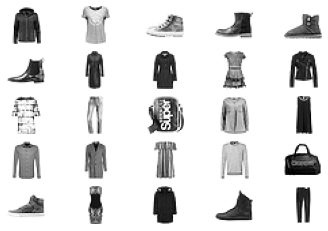

In [61]:
from matplotlib import pyplot as plt

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(Xtrain[i], cmap=plt.cm.Greys)
    plt.axis('off')

In [62]:
# Geron implementation P301
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [63]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_5 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [64]:
# Geron implementation P302
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

In [65]:
# Geron implementation P303
history = model.fit(Xtrain, ytrain, epochs=30,
                   validation_data=(Xvalid, yvalid))

Epoch 1/30
1719/1719 [==============================] - 10s 5ms/step - loss: 1.0076 - accuracy: 0.6800 - val_loss: 0.5344 - val_accuracy: 0.8186
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5100 - accuracy: 0.8247 - val_loss: 0.4728 - val_accuracy: 0.8322
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4528 - accuracy: 0.8437 - val_loss: 0.4162 - val_accuracy: 0.8576
Epoch 4/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4252 - accuracy: 0.8509 - val_loss: 0.4048 - val_accuracy: 0.8608
Epoch 5/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4000 - accuracy: 0.8594 - val_loss: 0.4043 - val_accuracy: 0.8612
Epoch 6/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3851 - accuracy: 0.8639 - val_loss: 0.3757 - val_accuracy: 0.8726
Epoch 7/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3697 - accuracy: 0.8714 - val_loss: 0.3652 - val_accu

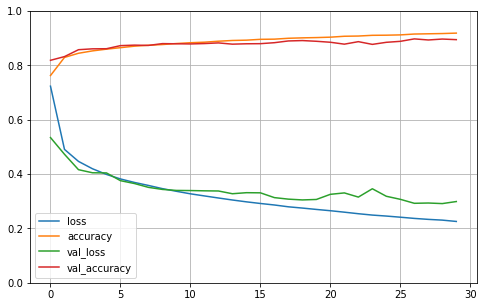

In [67]:
# Geron implementation P305
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [18]:
m = Sequential([
    Dense(units = 4, activation = 'relu', input_shape = (2,)),
    Dense(units = 1, activation = 'sigmoid')
])

#build computation graph
m.compile(optimizer='rmsprop',
         loss='binary_crossentropy',
         metrics=['accuracy'])

#print all layers
print(m.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________
None


In [23]:
#Train the model
h = m.fit(X, y, epochs=100, batch_size=50, validation_split=0.2)

Epoch 1/100
8/8 [==============================] - 0s 17ms/step - loss: 0.4315 - accuracy: 0.8575 - val_loss: 0.5158 - val_accuracy: 0.7900
Epoch 2/100
8/8 [==============================] - 0s 10ms/step - loss: 0.4265 - accuracy: 0.8575 - val_loss: 0.5125 - val_accuracy: 0.7900
Epoch 3/100
8/8 [==============================] - 0s 9ms/step - loss: 0.4217 - accuracy: 0.8575 - val_loss: 0.5091 - val_accuracy: 0.7900
Epoch 4/100
8/8 [==============================] - 0s 9ms/step - loss: 0.4169 - accuracy: 0.8575 - val_loss: 0.5059 - val_accuracy: 0.7900
Epoch 5/100
8/8 [==============================] - 0s 9ms/step - loss: 0.4122 - accuracy: 0.8575 - val_loss: 0.5028 - val_accuracy: 0.7900
Epoch 6/100
8/8 [==============================] - 0s 9ms/step - loss: 0.4077 - accuracy: 0.8575 - val_loss: 0.4996 - val_accuracy: 0.7900
Epoch 7/100
8/8 [==============================] - 0s 9ms/step - loss: 0.4033 - accuracy: 0.8575 - val_loss: 0.4967 - val_accuracy: 0.7900
Epoch 8/100
8/8 [========

In [29]:
print(len(h.history['loss']))
print(len(h.history['val_loss']))

100
100


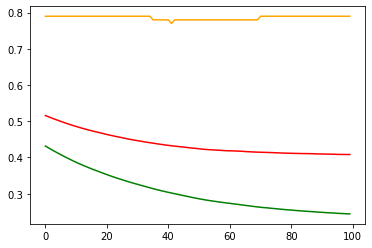

In [36]:
#plot the learning curve
plt.plot(h.history['loss'], c='green')
plt.plot(h.history['val_loss'], c='red')
plt.plot(h.history['val_accuracy'], c='orange')

In [37]:
score = m.evaluate(X, y, batch_size=50)
print(score)

10/10 [==============================] - 0s 3ms/step - loss: 0.2765 - accuracy: 0.8640
[0.2765083611011505, 0.8640000224113464]


In [38]:
#predict on data points - I think these have been used to train the model though
print(m.predict(X[:10]))

[[0.00392944]
 [0.01009843]
 [0.00941482]
 [0.4584752 ]
 [0.01939508]
 [0.94301164]
 [0.9664335 ]
 [0.8918525 ]
 [0.00575018]
 [0.9576297 ]]


In [40]:
X[:10]

array([[-0.48577749,  1.05513545],
       [ 0.29259392,  1.0989127 ],
       [ 0.17030514,  1.07539849],
       [ 0.02325115,  0.0773714 ],
       [-0.67486889,  0.68640069],
       [ 1.14816383, -0.41440007],
       [ 1.60780339, -0.3583927 ],
       [ 0.57881133, -0.2497821 ],
       [-0.34563409,  1.0181833 ],
       [ 1.39939095, -0.58820076]])

In [42]:
m.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


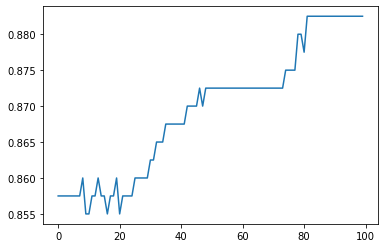

In [47]:
acc = h.history['accuracy']
plt.plot(range(len(acc)),acc)

In [48]:
!pip install h5py

You should consider upgrading via the '/opt/anaconda3/envs/dl/bin/python -m pip install --upgrade pip' command.


In [49]:
!pip install --upgrade pip

  Using cached pip-21.1.2-py3-none-any.whl (1.5 MB)
  Attempting uninstall: pip
    Found existing installation: pip 21.0
    Uninstalling pip-21.0:
      Successfully uninstalled pip-21.0


In [ ]:
#examining model weights

#save a list of np.arrays with the weights
w = m.

In [51]:
!pip install pydot

In [55]:
!pip install pydot

In [56]:
from IPython.display import SVG
from tensorflow.keras.utils import plot_model

plot_model(m,
          to_file='model.png',
          show_shapes=False,
          show_layer_names=True,
          rankdir='TB', expand_nested=False, dpi=96
          )

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [52]:
y[:10]

array([0, 0, 0, 1, 0, 1, 1, 1, 0, 1])

In [53]:
ytrain[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)